In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [87]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

## Understanding the Data

In [88]:
df.shape

(891, 12)

In [89]:
# It will tell us datatype and count of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
# It shows the null values in columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
# It will give fair idea about quartile range, mean and std.
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
# It gives no of copied rows in dataset.
df.duplicated().sum()

0

<AxesSubplot:>

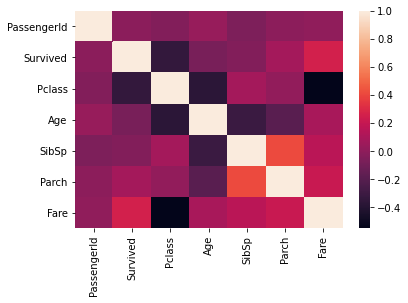

In [93]:
# This shows the correletion betn dependent and independent features 
sns.heatmap(df.corr())

# 

# EDA
## Univariate & Bivariate

In [94]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.15,NaN,S


C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

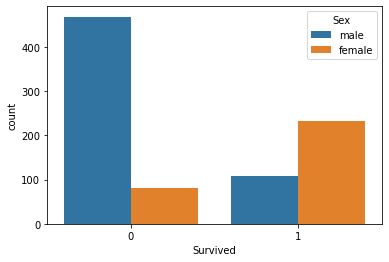

In [95]:
sns.countplot(df.Survived,hue=df.Sex)
#It shows that male traveler died more in compare to women

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

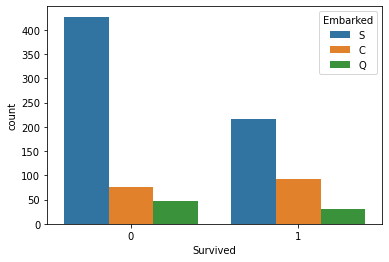

In [96]:
sns.countplot(df.Survived,hue=df.Embarked)
# Most of the passsenger died are from cabin S

<AxesSubplot:xlabel='Age', ylabel='Count'>

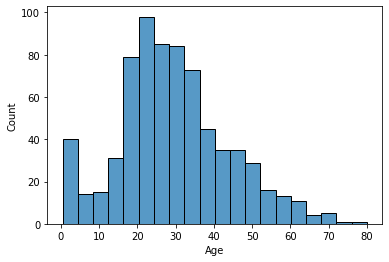

In [97]:
#It shows most of the passengers are from 20 - 40 age
sns.histplot(df.Age)

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

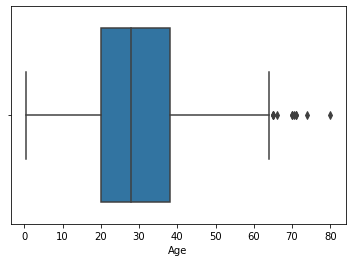

In [98]:
sns.boxplot(df.Age)
# As we see there is some outliers in age feature 

# 

## Feature Selection

In [99]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.975,NaN,S


In [100]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [101]:
df.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
763,1,1,female,36.0,1,2,120.0,S


# 

## Feature Engneering

In [102]:
def impute(x):
    Age = x[0]
    
    Pclass = x[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 35
        elif Pclass == 2:
            return 28
        elif Pclass == 3:
            return 25
    else:
        return Age    

In [103]:
df['Age']=df[['Age','Pclass']].apply(impute,axis=1)

In [104]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [105]:
df.dropna(inplace=True)

In [106]:
df = pd.get_dummies(data=df,drop_first=True)

In [107]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# 

## Train_test_split

In [108]:
# before doing anything further lets divide the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [109]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
708,1,22.0,0,0,151.5500,0,0,1
240,3,25.0,1,0,14.4542,0,0,0
382,3,32.0,0,0,7.9250,1,0,1
792,3,25.0,8,2,69.5500,0,0,1
683,3,14.0,5,2,46.9000,1,0,1


# 

## Model Selection,Tunning and Evaluation

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [114]:
# Rondom Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=10,scoring='accuracy'))

0.8186032863849764

In [115]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred =gb.predict(X_test)
np.mean(cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=10,scoring='accuracy'))

0.8298513302034427

In [116]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)

np.mean(cross_val_score(LogisticRegression(),X_train,y_train,cv=10,scoring='accuracy'))

C:\Users\91735\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91735\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8016823161189359

In [117]:
# Support Vector Machine
svc =SVC()
svc.fit(X_train,y_train)
y_pred =svc.predict(X_test)
np.mean(cross_val_score(SVC(),X_train,y_train,cv=10,scoring='accuracy'))

0.6751760563380282

# 

## Hyperparameter Tunning 

In [118]:
from sklearn.model_selection import GridSearchCV

In [124]:
# No of tress in random forest
n_estimators = [10,15,20,40,60]

# number of feature to consider to every split
max_features = [0.2,0.6,1.0]

# Maximum no of levels in tree
max_depth = [2,4,6,8,10]

#Number of samples
max_samples = [0.5,0.75,1.0]

In [125]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples
}
print(param_grid)

{'n_estimators': [10, 15, 20, 40, 60], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 4, 6, 8, 10], 'max_samples': [0.5, 0.75, 1.0]}


In [126]:
#Hyperparameter Tunning of # Rondom Forest Classifier
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      cv=5,
                      verbose=2,
                      n_jobs=-1)

In [127]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 15, 20, 40, 60]},
             verbose=2)

In [128]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 10, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 60}
0.8452772579533143


# 

# Ensemble Techniques

## Bagging Classifier

In [131]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [132]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [135]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5,n_jobs=-1,scoring='accuracy')
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]},
             scoring='accuracy')

In [138]:
print(search.best_params_)
print(search.best_score_)

{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.4, 'n_estimators': 50}
0.8368265537279621


# 

## Boostng(AdaBoostClassifier)

In [140]:
from sklearn.ensemble import AdaBoostClassifier
grid = dict()
grid['n_estimators'] = [10,20,40,80,50,100,400,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,0.25,0.5,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')

In [141]:
grid_result = grid_search.fit(X,y)

In [142]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.813292 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10}


# 

## Stacking

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
estimators = [
('rf',RandomForestClassifier(n_estimators=10,random_state=42)),
('knn',KNeighborsClassifier(n_neighbors=10)),
('gbdt',GradientBoostingClassifier())]

In [145]:
from sklearn.ensemble import StackingClassifier
scl = StackingClassifier(estimators=estimators,
                        final_estimator=LogisticRegression(),
                        cv=10,n_jobs=-1)

In [146]:
scl.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [147]:
y_pred = scl.predict(X_test)
accuracy_score(y_test,y_pred)

0.8146067415730337